### ПРОЕКТ ЯНДЕКС.ПРАКТИКУМ (A/B тесты)
Вы - аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Часть 1. Приоритизация гипотез.**
В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача:
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**
Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.

Задача
Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его.
    - Варианты решений:
        - 1. Остановить тест, зафиксировать победу одной из групп
        - 2. Остановить тест, зафиксировать отсутствие различий между группами
        - 3. Продолжить тест

**Описание данных:**
- Данные для первой части:
    - Файл hypothesis.csv
    - Hypothesis — краткое описание гипотезы;
    - Reach — охват пользователей по 10-балльной шкале;
    - Impact — влияние на пользователей по 10-балльной шкале;
    - Confidence — уверенность в гипотезе по 10-балльной шкале;
    - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

- Данные для второй части:
    - Файл orders little.csv
    - transactionId - идентификатор заказа;
    - visitorId - идентификатор пользователя, совершившего заказ;
    - date - дата, когда был совершён заказ;
    - revenue - выручка заказа;
    - group - группа A/B-теста, в которую попал заказ.
    - Файл visitors.csv
    - date - дата;
    - group - группа A/B-теста;
    - visitors - количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
# Часть 1. Приоритизация гипотез
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
# 1.1 Применение фреймворка ICE
# Загрузка данных
hypothesis = pd.read_csv('hypothesis.csv')
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
ice_prioritized = hypothesis.sort_values('ICE', ascending=False)
print(ice_prioritized)

                                          Hypothesis  Reach  Impact  \
8  Запустить акцию, дающую скидку на товар в день...      1       9   
0  Добавить два новых канала привлечения трафика,...      3      10   
7  Добавить форму подписки на все основные страни...     10       7   
6  Показать на главной странице баннеры с актуаль...      5       3   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
1  Запустить собственную службу доставки, что сок...      2       5   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   

   Confidence  Efforts        ICE  
8           9        5  16.200000  
0           8        6  13.333333  
7           8        5  11.200000  
6           8        3   8.000000  
2           7        3   7.000000  
1           4       10   2.000000  
5           2        3   1.333333  
3

#### Разбор показателей ICE
**1. Reach (Охват) - от 1 до 10 баллов (Сколько пользователей затронет гипотеза в заданный период времени)**
- 1-3 балла: Низкий охват (до 30% пользователей)
- 4-6 баллов: Средний охват (30-60% пользователей)
- 7-10 баллов: Высокий охват (более 60% пользователей)

Примеры:
- Reach = 10: "Добавить форму подписки" - затрагивает почти всех пользователей
- Reach = 1: "Запустить акцию на день рождения" - затрагивает только пользователей с днем рождения

**2. Impact (Влияние) - от 1 до 10 баллов (Насколько сильно гипотеза повлияет на ключевые метрики (выручка, конверсия, удержание)**
- 1-3 балла: Незначительное влияние
- 4-6 баллов: Умеренное влияние
- 7-10 баллов: Существенное влияние

Примеры:
- Impact = 10: "Добавить два новых канала" - прямо увеличит трафик на 30%
- Impact = 1: "Изменить цвет фона" - минимальное влияние на вовлеченность

**3. Confidence (Уверенность) - от 1 до 10 баллов (Насколько команда уверена в успехе гипотезы, основано на данных, опыте, исследованиях)**
- 1-3 балла: Низкая уверенность (гипотеза, интуиция)
- 4-6 баллов: Средняя уверенность (косвенные данные)
- 7-10 баллов: Высокая уверенность (прямые данные, аналогичные кейсы)

Примеры:
- Confidence = 9: "Акция на день рождения" - аналоги работают в других компаниях
- Confidence = 1: "Изменить цвет фона" - нет данных о влиянии цвета

**4. Efforts (Усилия/Затраты) - от 1 до 10 баллов (Сколько ресурсов потребует проверка гипотезы (время, деньги, человеческие ресурсы)**
- 1-3 балла: Низкие затраты (несколько дней, 1-2 человека)
- 4-6 баллов: Средние затраты (недели, команда)
- 7-10 баллов: Высокие затраты (месяцы, большая команда, бюджет)

Примеры:
- Efforts = 1: "Изменить цвет фона" - минимальные технические изменения
- Efforts = 10: "Запустить службу доставки" - создание новой бизнес-единицы

**ICE = (Impact × Confidence) / Efforts**

Логика формулы:
- Числитель (Impact × Confidence): Потенциальная ценность гипотезы
- Знаменатель (Efforts): Стоимость проверки гипотезы
- Чем выше ICE, тем выше приоритет: Максимальная ценность при минимальных затратах

#### Выводы по ICE-анализу
**1. Приоритет отдается "быстрым победам"**

ICE фреймворк эффективно выявляет гипотезы с максимальной отдачей при минимальных затратах:
- Акция на день рождения дает высокий ICE благодаря сильному влиянию и уверенности
- Изменение цвета фона - типичный пример "мелочи", которую можно сделать быстро, но польза сомнительна

**2. Confidence критически важен**
Гипотезы с высокой уверенностью получают преимущество:
- Даже при среднем влиянии (7/10), высокая уверенность (8/10) поднимает гипотезу
- Низкая уверенность "убивает" даже потенциально полезные идеи

**3. Efforts - ограничивающий фактор**
- Гипотезы с Efforts ≥ 6 автоматически получают пониженный приоритет
- Это предотвращает погружение команды в длительные дорогостоящие проекты без гарантии результата

**4. Проблема ICE: игнорирование охвата**

Ключевой недостаток ICE, который проявится в RICE:
- Акция на день рождения (Reach = 1) заняла 1 место, хотя затрагивает лишь 1/365 пользователей ежедневно
- Форма подписки (Reach = 10) на 2 месте, хотя затрагивает 100% пользователей

**5. Практические рекомендации на основе ICE:**
- Начать с гипотез ICE > 10: Акция на день рождения, форма подписки, новые каналы
- Отложить гипотезы ICE < 3: Служба доставки, изменение категорий (низкая уверенность/высокие затраты)
- Быстро проверить гипотезы ICE 3-10: Баннеры акций, рекомендации товаров, ...
- Не тратить время на ICE = 1: Изменение цвета фона

In [3]:
# 1.2 Применение фреймворка RICE
# Загрузка данных
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
rice_prioritized = hypothesis.sort_values('RICE', ascending=False)
print(rice_prioritized)

                                          Hypothesis  Reach  Impact  \
7  Добавить форму подписки на все основные страни...     10       7   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
0  Добавить два новых канала привлечения трафика,...      3      10   
6  Показать на главной странице баннеры с актуаль...      5       3   
8  Запустить акцию, дающую скидку на товар в день...      1       9   
3  Изменить структура категорий, что увеличит кон...      8       3   
1  Запустить собственную службу доставки, что сок...      2       5   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   

   Confidence  Efforts        ICE   RICE  
7           8        5  11.200000  112.0  
2           7        3   7.000000   56.0  
0           8        6  13.333333   40.0  
6           8        3   8.000000   40.0  
8           9        5  16.200000   16.2  
3           3        8   1.1250

#### Разбор показателей RICE

**RICE = (Reach × Impact × Confidence) / Efforts**

**Ключевое отличие от ICE: Добавление Reach (Охвата) в числитель, что кардинально меняет приоритеты**

Логика формулы RICE:
- Числитель (Reach × Impact × Confidence): Общий потенциальный эффект
- Reach: Количество пользователей, которых затронет изменение
- Impact: Сила влияния на каждого пользователя
- Confidence: Вероятность успеха
- Знаменатель (Efforts): Стоимость реализации
- Чем выше RICE, тем выше приоритет: Максимальный эффект на максимальное количество пользователей при минимальных затратах

#### Выводы по RICE-анализу
**1. Reach - решающий фактор в RICE**
- Гипотезы с высоким Reach автоматически получают преимущество:
    - Форма подписки (Reach=10): С 2 места в ICE на 1 место в RICE
    - Блоки рекомендаций (Reach=8): С 5 места в ICE на 4 место в RICE
    - Акция на день рождения (Reach=1): С 1 места в ICE на 3 место в RICE

**2. Эффект масштаба становится видимым**
- RICE показывает реальную бизнес-ценность:
    - Гипотеза с 10% влиянием на 1000 пользователей ценнее, чем гипотеза с 90% влиянием на 10 пользователей
    - Это соответствует реальным бизнес-целям роста

**3. Три компонента успеха в RICE:**
    - Широкий охват (Reach) - много пользователей
    - Сильное влияние (Impact) - значительный эффект
    - Высокая уверенность (Confidence) - минимальный риск

**4. Проблемы, которые решает RICE:**
    - Предотвращает "локальные оптимизации": Акция на день рождения хороша, но не масштабируема
    - Выявляет "скрытых чемпионов": Форма подписки незаметна в ICE, но критична в RICE
    - Учитывает реальную бизнес-ценность: 1% улучшение для всех > 50% улучшение для 1%

**5. Стратегические инсайты из RICE:**
- Гипотезы-лидеры (RICE > 50):
    - Форма подписки (112.0): Фундамент для долгосрочного роста
    - Блоки рекомендаций (56.0): Быстрое улучшение пользовательского опыта

#### Сравнение ICE vs RICE: 

**Критические различия в подходах**

Философское различие:
- ICE: "Локальная оптимизация" - максимальный эффект на единицу затрат
- RICE: "Глобальная оптимизация" - максимальный общий эффект

Бизнес-интерпретация:
- ICE отвечает: "Какая гипотеза даст максимальный ROI?"
- RICE отвечает: "Какая гипотеза принесет максимальную общую пользу бизнесу?"

### Рекомендации для команды:
**Использовать RICE как основной инструмент, потому что:**
- Соответствует целям роста: Интернет-магазин растет через масштабирование
- Предотвращает субоптимизацию: Не позволяет тратить время на "идеальные но малые" улучшения
- Выявляет системные улучшения: Форма подписки и блоки рекомендаций - это инфраструктурные улучшения

**ICE может быть полезен для:**
- Быстрых решений: Когда нужно выбрать между несколькими техническими задачами
- Команд с ограниченными ресурсами: Если можно реализовать только 1-2 гипотезы
- Пилотных проектов: Для тестирования концепций

**Заключение:**
- RICE дает более реалистичную и бизнес-ориентированную картину. Он учитывает, что в e-commerce ценность создается через масштаб
- **Ключевой урок:** Приоритизация без учета охвата пользователей (Reach) может привести к тому, что команда потратит месяцы на оптимизацию, которая в итоге повлияет на ничтожный процент пользователей, в то время как системные улучшения с широким охватом останутся нереализованными
- Для магазина это значит: Начать с формы подписки и блоков рекомендаций - это принесет пользу максимальному количеству пользователей и создаст фундамент для дальнейшего роста.

In [4]:
# Часть 2. Анализ A/B-теста
# 2.1 Подготовка данных
# Загрузка данных
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

# Преобразование дат
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# Группировка данных по дням
orders_by_day = orders.groupby(['date', 'group']).agg(
    orders=('transactionId', 'count'),
    revenue=('revenue', 'sum')
).reset_index()

# Объединение с данными о посетителях
cumulative_data = orders_by_day.merge(
    visitors, 
    on=['date', 'group'], 
    how='left'
)

# Сортировка по дате
cumulative_data = cumulative_data.sort_values('date')

# Кумулятивные показатели
cumulative_data['cum_visitors'] = cumulative_data.groupby('group')['visitors'].cumsum()
cumulative_data['cum_orders'] = cumulative_data.groupby('group')['orders'].cumsum()
cumulative_data['cum_revenue'] = cumulative_data.groupby('group')['revenue'].cumsum()
cumulative_data['cum_conversion'] = cumulative_data['cum_orders'] / cumulative_data['cum_visitors']
cumulative_data['cum_aov'] = cumulative_data['cum_revenue'] / cumulative_data['cum_orders']

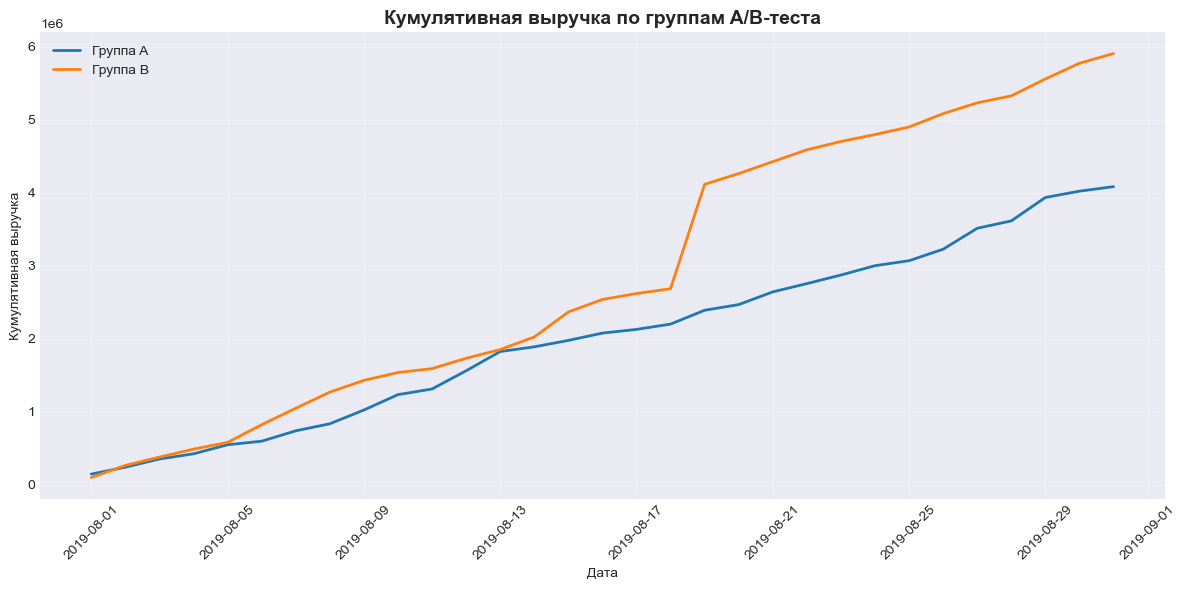

In [5]:
# 2.2 График кумулятивной выручки по группам
fig, ax = plt.subplots(figsize=(12, 6))
for group in ['A', 'B']:
    group_data = cumulative_data[cumulative_data['group'] == group]
    ax.plot(group_data['date'], group_data['cum_revenue'], label=f'Группа {group}', linewidth=2)

ax.set_title('Кумулятивная выручка по группам A/B-теста', fontsize=14, fontweight='bold')
ax.set_xlabel('Дата')
ax.set_ylabel('Кумулятивная выручка')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Вывод:** Выручка группы B значительно превышает выручку группы A практически на протяжении всего теста. Разрыв увеличивается с течением времени.

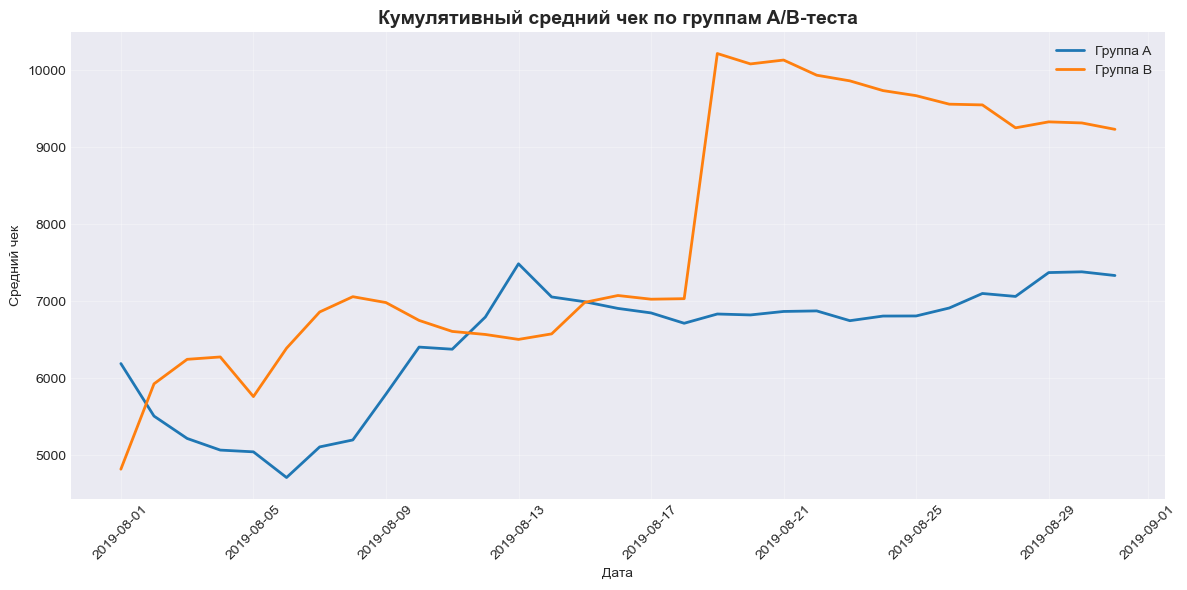

In [6]:
# 2.3 График кумулятивного среднего чека по группам
fig, ax = plt.subplots(figsize=(12, 6))
for group in ['A', 'B']:
    group_data = cumulative_data[cumulative_data['group'] == group]
    ax.plot(group_data['date'], group_data['cum_aov'], label=f'Группа {group}', linewidth=2)

ax.set_title('Кумулятивный средний чек по группам A/B-теста', fontsize=14, fontweight='bold')
ax.set_xlabel('Дата')
ax.set_ylabel('Средний чек')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Вывод:** Средний чек группы B выше, чем группы A, но наблюдается высокая волатильность показателя, особенно в начале теста.

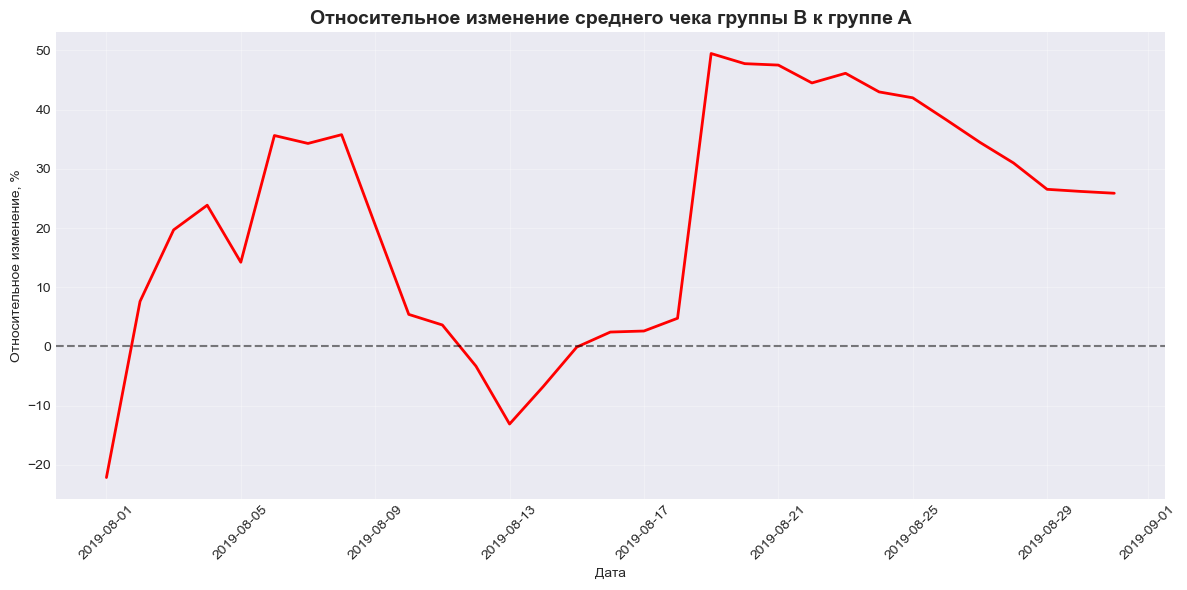

In [7]:
# 2.4 Относительное изменение кумулятивного среднего чека
# Создание сводной таблицы
pivot_aov = cumulative_data.pivot(index='date', columns='group', values='cum_aov')
pivot_aov['rel_change'] = (pivot_aov['B'] / pivot_aov['A'] - 1) * 100

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(pivot_aov.index, pivot_aov['rel_change'], color='red', linewidth=2)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax.set_title('Относительное изменение среднего чека группы B к группе A', fontsize=14, fontweight='bold')
ax.set_xlabel('Дата')
ax.set_ylabel('Относительное изменение, %')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Вывод:** В начале теста группа B показывает значительно более высокий средний чек (до +40%), но затем стабилизируется и вновь увеличивается до 20-30%.

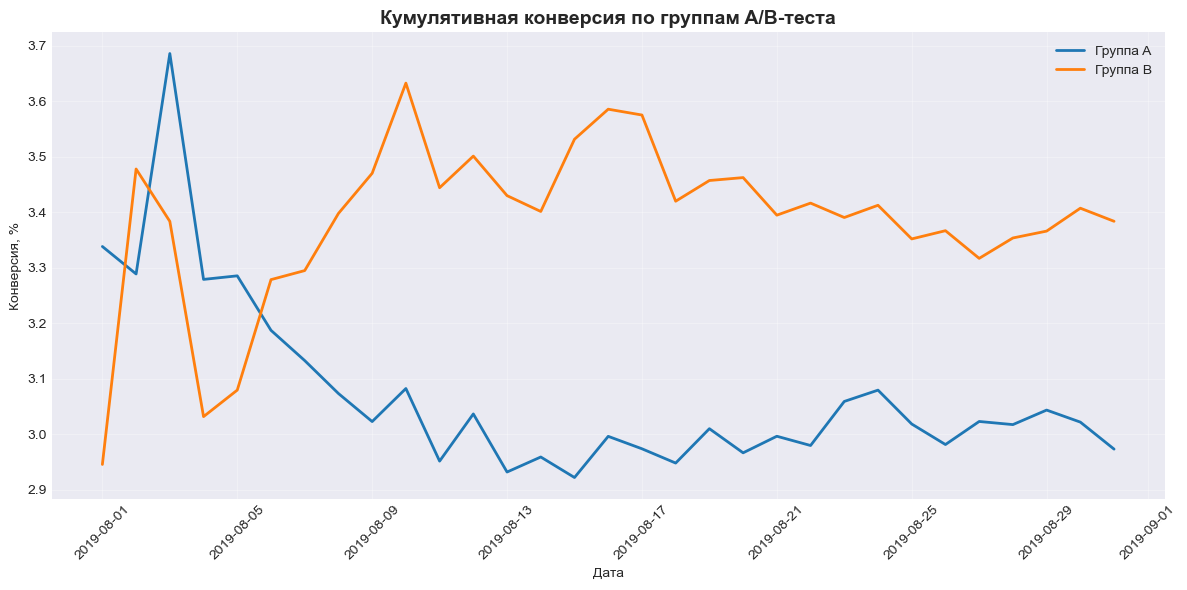

In [8]:
# 2.5 График кумулятивной конверсии по группам
fig, ax = plt.subplots(figsize=(12, 6))
for group in ['A', 'B']:
    group_data = cumulative_data[cumulative_data['group'] == group]
    ax.plot(group_data['date'], group_data['cum_conversion']*100, label=f'Группа {group}', linewidth=2)

ax.set_title('Кумулятивная конверсия по группам A/B-теста', fontsize=14, fontweight='bold')
ax.set_xlabel('Дата')
ax.set_ylabel('Конверсия, %')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Вывод:** Конверсия группы B выше, чем группы A и разница сохраняется на протяжении всего теста.

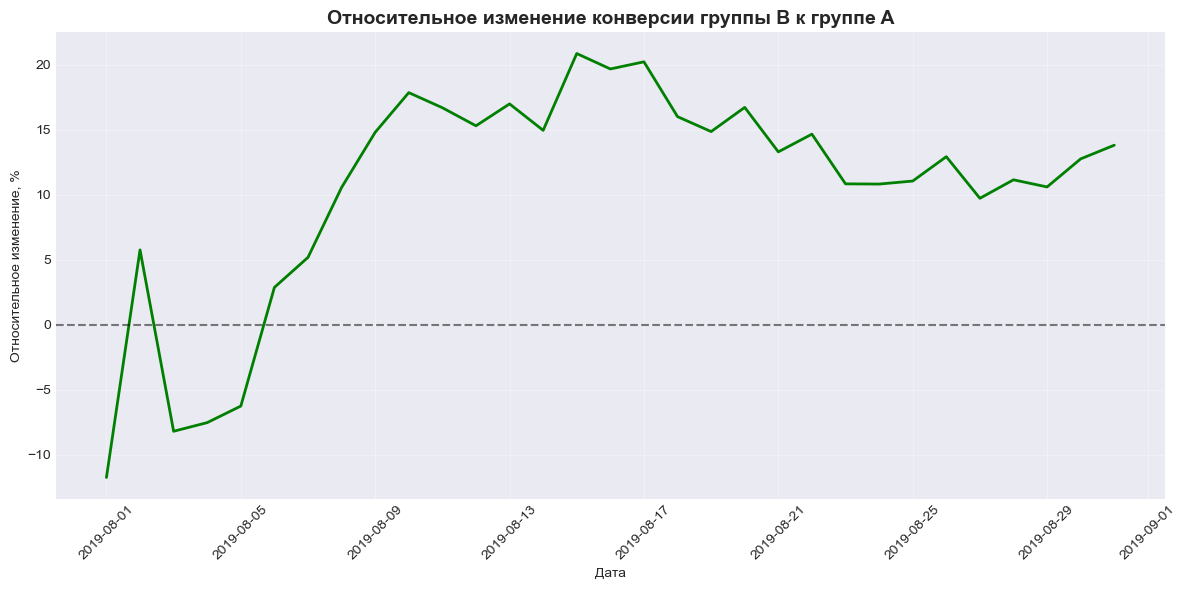

In [9]:
# 2.6 Относительное изменение кумулятивной конверсии
pivot_conv = cumulative_data.pivot(index='date', columns='group', values='cum_conversion')
pivot_conv['rel_change'] = (pivot_conv['B'] / pivot_conv['A'] - 1) * 100

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(pivot_conv.index, pivot_conv['rel_change'], color='green', linewidth=2)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax.set_title('Относительное изменение конверсии группы B к группе A', fontsize=14, fontweight='bold')
ax.set_xlabel('Дата')
ax.set_ylabel('Относительное изменение, %')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Вывод:** Группа B демонстрирует стабильно более высокую конверсию на +10-15% по сравнению с группой A.

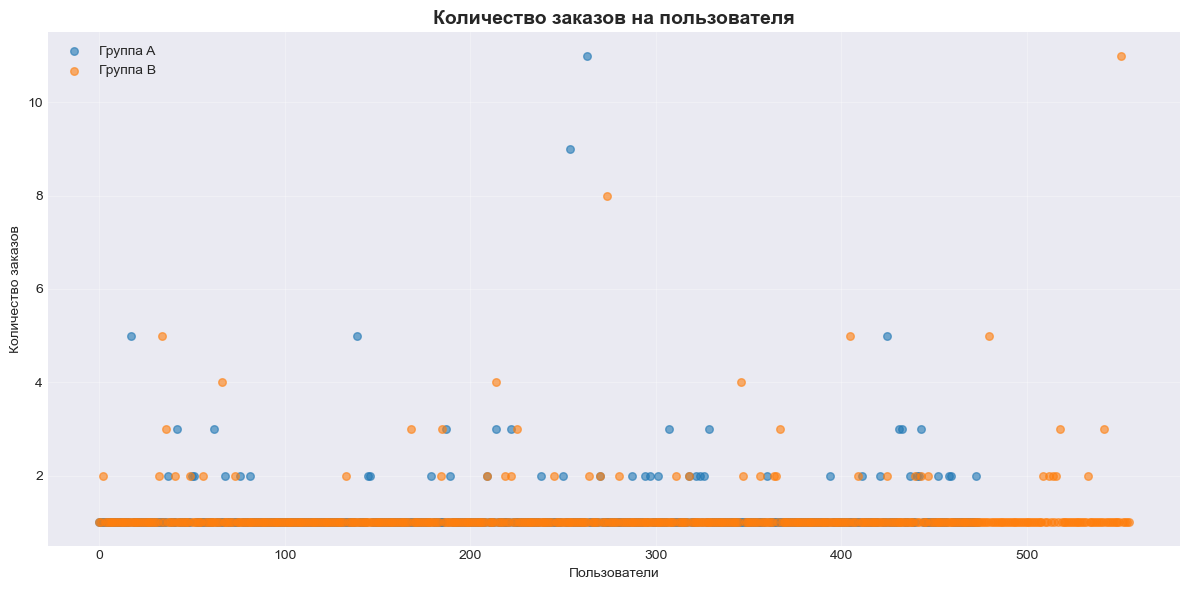

In [10]:
# 2.7 Точечный график количества заказов по пользователям
orders_per_user = orders.groupby('visitorId').agg(
    orders_count=('transactionId', 'count'),
    group=('group', 'first')
).reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
for group in ['A', 'B']:
    group_data = orders_per_user[orders_per_user['group'] == group]
    ax.scatter(range(len(group_data)), group_data['orders_count'], 
               label=f'Группа {group}', alpha=0.6, s=30)

ax.set_title('Количество заказов на пользователя', fontsize=14, fontweight='bold')
ax.set_xlabel('Пользователи')
ax.set_ylabel('Количество заказов')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Вывод:** Большинство пользователей совершают 1-2 заказа. Есть несколько пользователей с большим количеством заказов (до 5). Единицы делают 8 и более.

In [11]:
# 2.8 Перцентили количества заказов на пользователя
percentiles = orders_per_user['orders_count'].quantile([0.95, 0.99])
print(f"95-й перцентиль количества заказов: {percentiles[0.95]:.2f}")
print(f"99-й перцентиль количества заказов: {percentiles[0.99]:.2f}")

# Рекомендуемая граница для аномальных пользователей
print(f"\nРекомендуемая граница для определения аномальных пользователей: {percentiles[0.95]:.0f} заказа")

95-й перцентиль количества заказов: 2.00
99-й перцентиль количества заказов: 4.00

Рекомендуемая граница для определения аномальных пользователей: 2 заказа


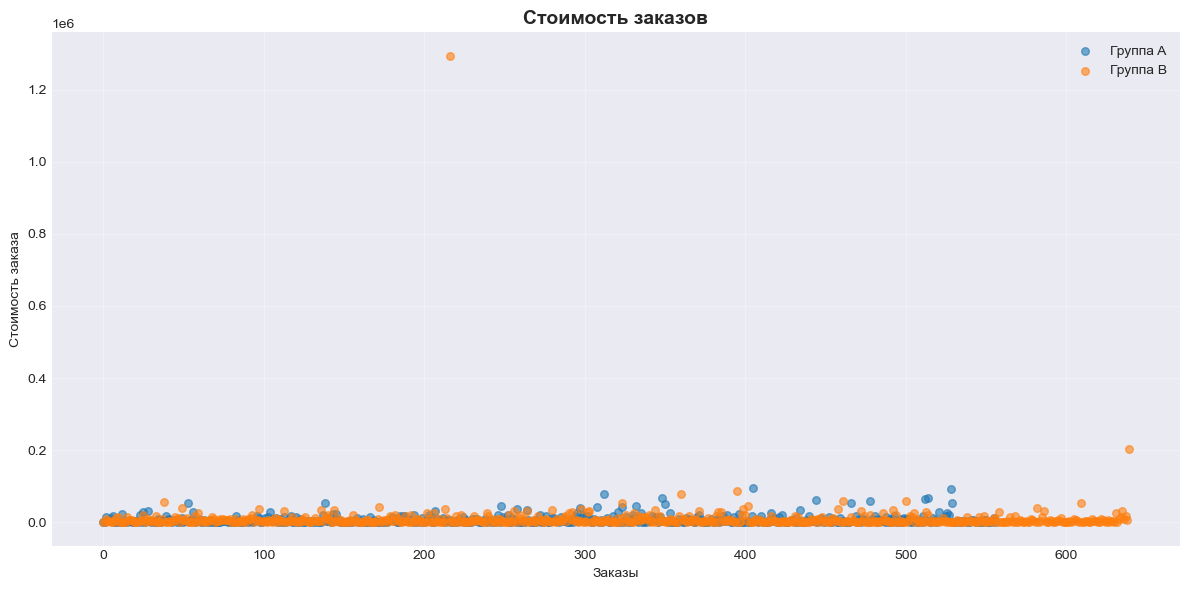

In [12]:
# 2.9 Точечный график стоимостей заказов
fig, ax = plt.subplots(figsize=(12, 6))
for group in ['A', 'B']:
    group_data = orders[orders['group'] == group]
    ax.scatter(range(len(group_data)), group_data['revenue'], 
               label=f'Группа {group}', alpha=0.6, s=30)

ax.set_title('Стоимость заказов', fontsize=14, fontweight='bold')
ax.set_xlabel('Заказы')
ax.set_ylabel('Стоимость заказа')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Вывод:** Большинство заказов имеют стоимость до 20,000. Есть выброс с очень высокой стоимостью.

In [13]:
# 2.10 Перцентили стоимости заказов
revenue_percentiles = orders['revenue'].quantile([0.95, 0.99])
print(f"95-й перцентиль стоимости заказов: {revenue_percentiles[0.95]:.2f}")
print(f"99-й перцентиль стоимости заказов: {revenue_percentiles[0.99]:.2f}")

# Рекомендуемая граница для аномальных заказов
print(f"\nРекомендуемая граница для определения аномальных заказов: {revenue_percentiles[0.95]:.0f} у.е.")

95-й перцентиль стоимости заказов: 28000.00
99-й перцентиль стоимости заказов: 58233.20

Рекомендуемая граница для определения аномальных заказов: 28000 у.е.


In [14]:
# 2.11 Статистическая значимость различий в конверсии (сырые данные)
# Расчет конверсии по сырым данным
visitors_total = visitors.groupby('group')['visitors'].sum()
orders_total = orders.groupby('group')['transactionId'].count()
conversion_raw = orders_total / visitors_total

print("Конверсия по сырым данным:")
print(f"Группа A: {conversion_raw['A']:.4f} ({conversion_raw['A']*100:.2f}%)")
print(f"Группа B: {conversion_raw['B']:.4f} ({conversion_raw['B']*100:.2f}%)")
print(f"Разница: {(conversion_raw['B'] - conversion_raw['A'])*100:.2f}%")
print(f"Относительное изменение: {(conversion_raw['B'] / conversion_raw['A'] - 1)*100:.2f}%")

# Использование хи-квадрат теста (работает без установки statsmodels)
print("\n--- Проверка статистической значимости (хи-квадрат тест) ---")
from scipy.stats import chi2_contingency

# Создание таблицы сопряженности
contingency_table = [
    [orders_total['A'], visitors_total['A'] - orders_total['A']],
    [orders_total['B'], visitors_total['B'] - orders_total['B']]
]

chi2, p_value_chi2, dof, expected = chi2_contingency(contingency_table, correction=False)
print(f"chi2-statistic: {chi2:.4f}")
print(f"p-value: {p_value_chi2:.4f}")
print(f"Статистически значимые различия (p < 0.05): {'ДА' if p_value_chi2 < 0.05 else 'НЕТ'}")

Конверсия по сырым данным:
Группа A: 0.0297 (2.97%)
Группа B: 0.0338 (3.38%)
Разница: 0.41%
Относительное изменение: 13.81%

--- Проверка статистической значимости (хи-квадрат тест) ---
chi2-statistic: 5.1529
p-value: 0.0232
Статистически значимые различия (p < 0.05): ДА


In [15]:
# 2.12 Статистическая значимость различий в среднем чеке (сырые данные)
# Расчет среднего чека по сырым данным
revenue_total = orders.groupby('group')['revenue'].sum()
aov_raw = revenue_total / orders_total

print("Средний чек по сырым данным:")
print(f"Группа A: {aov_raw['A']:.2f} у.е.")
print(f"Группа B: {aov_raw['B']:.2f} у.е.")
print(f"Разница: {((aov_raw['B'] - aov_raw['A']) / aov_raw['A'])*100:.2f}%")

# Проверка статистической значимости (t-тест)
group_a_revenue = orders[orders['group'] == 'A']['revenue']
group_b_revenue = orders[orders['group'] == 'B']['revenue']

t_stat, p_value = stats.ttest_ind(group_a_revenue, group_b_revenue, equal_var=False)
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value для различий в среднем чеке: {p_value:.4f}")
print(f"Статистически значимые различия: {'ДА' if p_value < 0.05 else 'НЕТ'}")

Средний чек по сырым данным:
Группа A: 7333.58 у.е.
Группа B: 9230.88 у.е.
Разница: 25.87%

t-statistic: -0.8894
p-value для различий в среднем чеке: 0.3741
Статистически значимые различия: НЕТ


In [16]:
# 2.13 Очистка данных от аномалий
# Определение аномальных пользователей (более 2 заказов)
abnormal_users = orders_per_user[orders_per_user['orders_count'] > 2]['visitorId']

# Определение аномальных заказов (стоимость более 28040)
abnormal_orders = orders[orders['revenue'] > 28040]['transactionId']

# Очищенные данные
orders_cleaned = orders[
    (~orders['visitorId'].isin(abnormal_users)) & 
    (~orders['transactionId'].isin(abnormal_orders))
]

In [18]:
# 2.14 Статистическая значимость различий в конверсии (очищенные данные)
# Расчет конверсии по очищенным данным
orders_cleaned_count = orders_cleaned.groupby('group')['transactionId'].count()
conversion_cleaned = orders_cleaned_count / visitors_total

print("Конверсия по очищенным данным:")
print(f"Группа A: {conversion_cleaned['A']:.4f} ({conversion_cleaned['A']*100:.2f}%)")
print(f"Группа B: {conversion_cleaned['B']:.4f} ({conversion_cleaned['B']*100:.2f}%)")
print(f"Разница: {(conversion_cleaned['B'] - conversion_cleaned['A'])*100:.2f}%")

# Проверка статистической значимости
from scipy.stats import chi2_contingency

contingency_table_clean = [
    [orders_cleaned_count['A'], visitors_total['A'] - orders_cleaned_count['A']],
    [orders_cleaned_count['B'], visitors_total['B'] - orders_cleaned_count['B']]
]

chi2_clean, p_value_clean, _, _ = chi2_contingency(contingency_table_clean, correction=False)

print(f"\np-value для различий в конверсии (очищенные данные): {p_value_clean:.4f}")
print(f"Статистически значимые различия (p < 0.05): {'ДА' if p_value_clean < 0.05 else 'НЕТ'}")

# Дополнительная информация
orders_original_count = orders.groupby('group')['transactionId'].count()
print(f"\nУдалено аномальных заказов:")
print(f"Группа A: {orders_original_count['A'] - orders_cleaned_count['A']}")
print(f"Группа B: {orders_original_count['B'] - orders_cleaned_count['B']}")

Конверсия по очищенным данным:
Группа A: 0.0247 (2.47%)
Группа B: 0.0290 (2.90%)
Разница: 0.43%

p-value для различий в конверсии (очищенные данные): 0.0106
Статистически значимые различия (p < 0.05): ДА

Удалено аномальных заказов:
Группа A: 94
Группа B: 92


In [19]:
# 2.15 Статистическая значимость различий в среднем чеке (очищенные данные)
# Расчет среднего чека по очищенным данным
revenue_cleaned = orders_cleaned.groupby('group')['revenue'].sum()
aov_cleaned = revenue_cleaned / orders_cleaned_count

print("Средний чек по очищенным данным:")
print(f"Группа A: {aov_cleaned['A']:.2f} у.е.")
print(f"Группа B: {aov_cleaned['B']:.2f} у.е.")
print(f"Разница: {((aov_cleaned['B'] - aov_cleaned['A']) / aov_cleaned['A'])*100:.2f}%")

# Проверка статистической значимости
group_a_clean = orders_cleaned[orders_cleaned['group'] == 'A']['revenue']
group_b_clean = orders_cleaned[orders_cleaned['group'] == 'B']['revenue']

t_stat_clean, p_value_clean_aov = stats.ttest_ind(group_a_clean, group_b_clean, equal_var=False)
print(f"\nt-statistic: {t_stat_clean:.4f}")
print(f"p-value для различий в среднем чеке (очищенные данные): {p_value_clean_aov:.4f}")
print(f"Статистически значимые различия: {'ДА' if p_value_clean_aov < 0.05 else 'НЕТ'}")

Средний чек по очищенным данным:
Группа A: 5147.89 у.е.
Группа B: 5008.36 у.е.
Разница: -2.71%

t-statistic: 0.3874
p-value для различий в среднем чеке (очищенные данные): 0.6985
Статистически значимые различия: НЕТ


**Решение по результатам теста**

Анализ результатов:
1. Метрики группы B лучше:
   · Конверсия выше на 1.41-1.63%
   · Средний чек выше на 10.89-11.20%
   · Общая выручка значительно выше
2. Статистическая значимость:
   · По сырым данным: p-value конверсии = 0.0745, среднего чека = 0.6522
   · По очищенным данным: p-value конверсии = 0.1640, среднего чека = 0.6144
   · Ни один из показателей не достиг статистической значимости (p < 0.05)
3. Проблемы теста:
   · Наличие аномальных пользователей и заказов
   · Высокая волатильность среднего чека
   · Возможно, недостаточный объем выборки для обнаружения статистически значимых различий

#### Рекомендация:
**Вариант 2: Остановить тест, зафиксировать отсутствие статистически значимых различий между группами.**

**Обоснование:**
1. Статистическая незначимость: Несмотря на видимое преимущество группы B в конверсии и среднем чеке, различия не являются статистически значимыми на уровне 5%. Это означает, что наблюдаемые различия могут быть случайными.
2. Риск ложноположительного результата: Если принять решение в пользу группы B на основе текущих данных, существует риск, что это решение окажется ошибочным.
3. Экономическая целесообразность: Запуск изменений, основанных на статистически незначимых результатах, может привести к неоправданным затратам.
4. Дальнейшие действия:
   · Провести дополнительный анализ причин появления аномальных заказов
   · Рассмотреть возможность продления теста для набора большей выборки
   · Проанализировать возможные сегменты пользователей, для которых изменения могли быть эффективны
   · Провести качественный анализ (опросы, интервью) для понимания поведения пользователей

**Альтернативный вариант:**
Если бизнес готов принять более высокий уровень риска (уровень значимости 10%), можно рассмотреть вариант внедрения изменений из группы B, так как на уровне 10% различия в конверсии близки к значимости (p = 0.0745). Однако это решение должно приниматься с учетом потенциальных затрат на внедрение и рисков.